# t-SNE examples implemented with openTSNE

In [1]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import plotly.graph_objects as go
import pyreadr
import pandas as pd

from d_and_c.methods import tsne
from d_and_c.utils import benchmark, runif_in_tetrahedron
from scipy.spatial.distance import pdist, squareform
from sklearn.datasets import make_swiss_roll

np.random.seed(42)

## 1. Two clusters with equal number of points
from https://distill.pub/2016/misread-tsne/ 

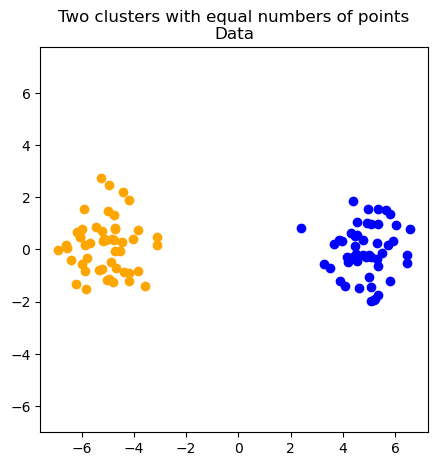

In [3]:
# Generate data
n_points = 100
n_per_cluster = n_points // 2

cluster1 = np.random.randn(n_per_cluster, 2) + np.array([5, 0])
cluster2 = np.random.randn(n_per_cluster, 2) + np.array([-5, 0])
two_clusters = np.vstack((cluster1, cluster2))

# Plot data
plt.figure(figsize=(5, 5))
plt.scatter(two_clusters[:n_per_cluster, 0], two_clusters[:n_per_cluster, 1],
            color='blue', label='Cluster 1')
plt.scatter(two_clusters[n_per_cluster:, 0], two_clusters[n_per_cluster:, 1],
            color='orange', label='Cluster 2')
plt.title('Two clusters with equal numbers of points\nData')
plt.axis('equal')
plt.show()

In [4]:
# Apply t-SNE
%time two_clusters_embedding = tsne(two_clusters, perplexity=30, n_iter=5000, learning_rate=10, random_state=42)

CPU times: user 26.4 s, sys: 3min 24s, total: 3min 50s
Wall time: 1min


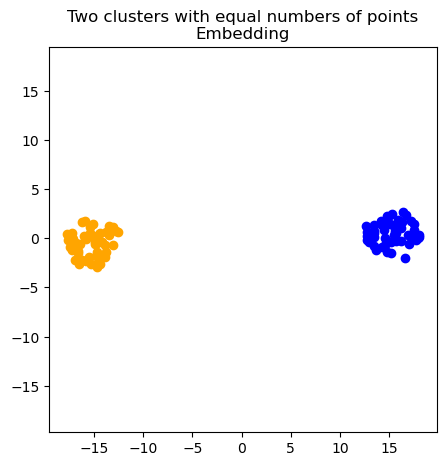

In [5]:
# Plot the t-SNE embedding
plt.figure(figsize=(5, 5))
plt.scatter(two_clusters_embedding[:n_per_cluster, 0], two_clusters_embedding[:n_per_cluster, 1],
            color='blue', label='Cluster 1')
plt.scatter(two_clusters_embedding[n_per_cluster:, 0], two_clusters_embedding[n_per_cluster:, 1],
            color='orange', label='Cluster 2')
plt.title('Two clusters with equal numbers of points\nEmbedding')
plt.axis('equal')
plt.show()

## 2. Random Gaussian walk
from https://distill.pub/2016/misread-tsne/ 

In [6]:
# Generate a random Gaussian walk
n_points = 100
n_dims = 100

walk = np.zeros((n_points, n_dims))
for i in range(1, n_points):
    walk[i] = walk[i-1] + np.random.randn(n_dims)

In [7]:
# Apply t-SNE
%time walk_embedding = tsne(walk, perplexity=10, n_iter=5000, learning_rate=5, random_state=42)

CPU times: user 25.5 s, sys: 3min 13s, total: 3min 38s
Wall time: 56.5 s


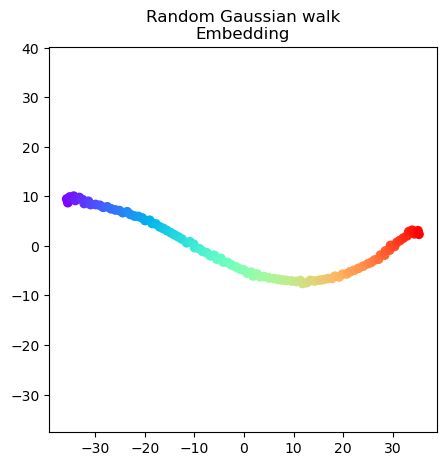

In [8]:
# Plot the t-SNE embedding
plt.figure(figsize=(5, 5))
plt.scatter(walk_embedding[:, 0], walk_embedding[:, 1],
            c=np.arange(n_points), cmap='rainbow')
plt.title('Random Gaussian walk\nEmbedding')
plt.axis('equal')
plt.show()

## 3. Tetrahedron

### 3.0 Tetrahedron vertices

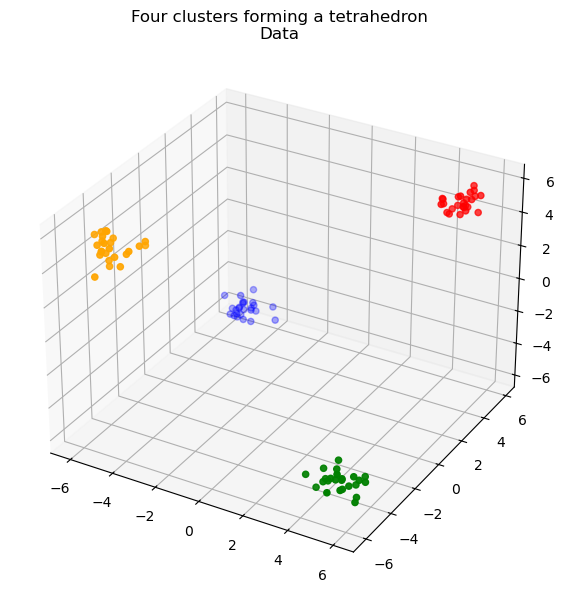

In [60]:
## Generate data
n_points = 100
points_per_cluster = n_points // 4

# Define vertices of a tetrahedron
vertices = np.array([
    [1, 1, 1],
    [1, -1, -1],
    [-1, 1, -1],
    [-1, -1, 1]
]) * 5


# Generate clusters with gaussian noise around each vertex
clusters = []
for vertex in vertices:
    cluster = np.random.randn(points_per_cluster, 3) * 0.5 + vertex
    clusters.append(cluster)
tetrahedron = np.vstack(clusters)

colors = ['red', 'green', 'blue', 'orange']
cluster_colors = np.repeat(colors, points_per_cluster)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tetrahedron[:,0], tetrahedron[:,1], tetrahedron[:,2],
            color=cluster_colors)
ax.set_title('Four clusters forming a tetrahedron\nData')
plt.show()

In [61]:
distances = squareform(pdist(vertices)); distances

array([[ 0.        , 14.14213562, 14.14213562, 14.14213562],
       [14.14213562,  0.        , 14.14213562, 14.14213562],
       [14.14213562, 14.14213562,  0.        , 14.14213562],
       [14.14213562, 14.14213562, 14.14213562,  0.        ]])

In [62]:
vertices2 = [[0,0,0], [1,0,0], [0,0,1], [0,1,0]]
distances2 = squareform(pdist(vertices2)); distances2

array([[0.        , 1.        , 1.        , 1.        ],
       [1.        , 0.        , 1.41421356, 1.41421356],
       [1.        , 1.41421356, 0.        , 1.41421356],
       [1.        , 1.41421356, 1.41421356, 0.        ]])

In [63]:
vertices3 = [[1,1,1], [1,0,0], [0,1,0], [0,0,1]]
distances3 = squareform(pdist(vertices3)); distances3

array([[0.        , 1.41421356, 1.41421356, 1.41421356],
       [1.41421356, 0.        , 1.41421356, 1.41421356],
       [1.41421356, 1.41421356, 0.        , 1.41421356],
       [1.41421356, 1.41421356, 1.41421356, 0.        ]])

In [64]:
# Regular tetrahedron with v1=(0,0,0)
v1 = np.array([0, 0, 0])
v2 = np.array([1, 0, 0])
v3 = np.array([0.5, np.sqrt(3)/2, 0])
v4 = np.array([0.5, np.sqrt(3)/6, np.sqrt(6)/3])
vertices4 = np.stack([v1, v2, v3, v4], axis=0)
distances4 = squareform(pdist(vertices4)); distances4

array([[0., 1., 1., 1.],
       [1., 0., 1., 1.],
       [1., 1., 0., 1.],
       [1., 1., 1., 0.]])

In [65]:
## Apply t-SNE
# random_state=1
%time tetrahedron_embedding_rs1_1 = tsne(tetrahedron, r=2, perplexity=10, n_iter=5000, learning_rate=5, random_state=1)
%time tetrahedron_embedding_rs1_2 = tsne(tetrahedron, r=2, perplexity=20, n_iter=5000, learning_rate=5, random_state=1)
%time tetrahedron_embedding_rs1_3 = tsne(tetrahedron, r=2, perplexity=10, n_iter=5000, learning_rate=10, random_state=1)
%time tetrahedron_embedding_rs1_4 = tsne(tetrahedron, r=2, perplexity=20, n_iter=5000, learning_rate=10, random_state=1)

# random_state=2
%time tetrahedron_embedding_rs2_1 = tsne(tetrahedron, r=2, perplexity=10, n_iter=5000, learning_rate=5, random_state=2)
%time tetrahedron_embedding_rs2_2 = tsne(tetrahedron, r=2, perplexity=20, n_iter=5000, learning_rate=5, random_state=2)
%time tetrahedron_embedding_rs2_3 = tsne(tetrahedron, r=2, perplexity=10, n_iter=5000, learning_rate=10, random_state=2)
%time tetrahedron_embedding_rs2_4 = tsne(tetrahedron, r=2, perplexity=20, n_iter=5000, learning_rate=10, random_state=2)

KeyboardInterrupt: 

: 

: 

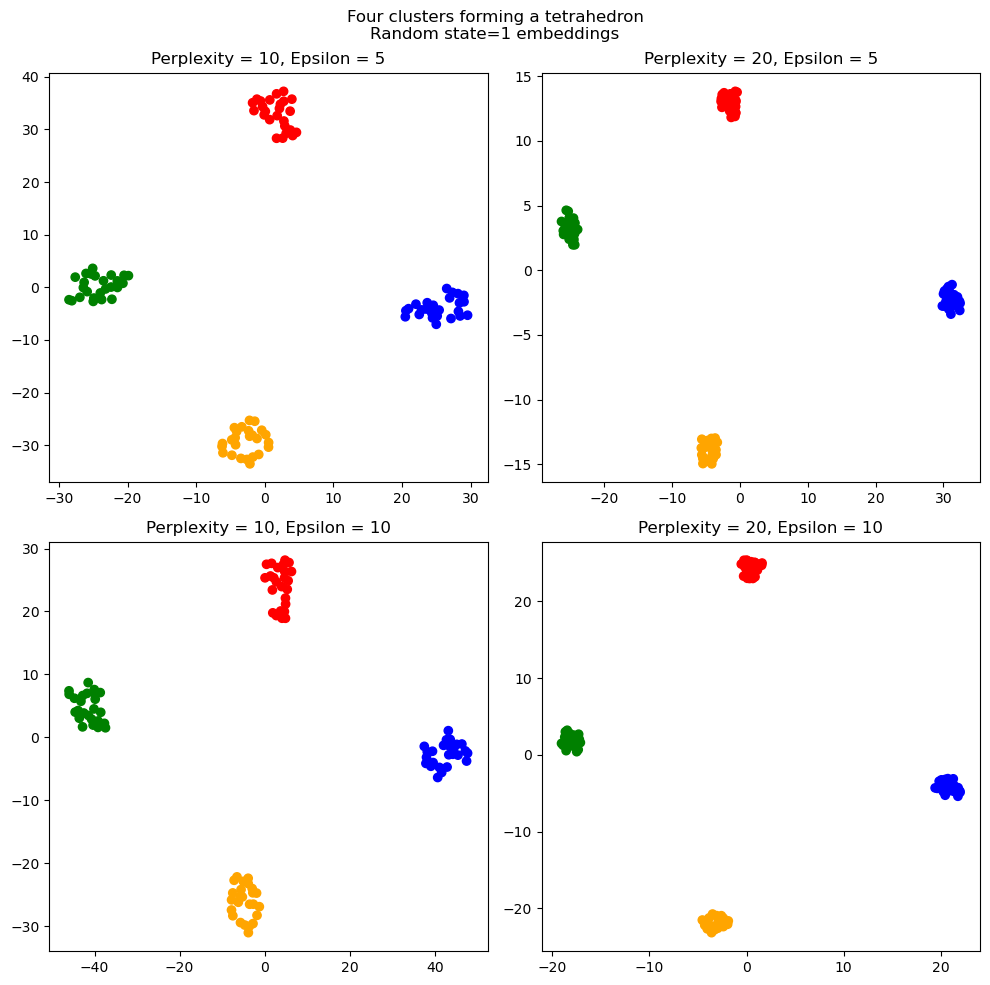

In [ ]:
## Plot the t-SNE embeddings
# random_state=1
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Four clusters forming a tetrahedron\nRandom state=1 embeddings')

ax1 = fig.add_subplot(221)
ax1.scatter(tetrahedron_embedding_rs1_1[:, 0], tetrahedron_embedding_rs1_1[:, 1],
            c=cluster_colors)
ax1.set_title('Perplexity = 10, Epsilon = 5')

ax2 = fig.add_subplot(222)
ax2.scatter(tetrahedron_embedding_rs1_2[:, 0], tetrahedron_embedding_rs1_2[:, 1],
            c=cluster_colors)
ax2.set_title('Perplexity = 20, Epsilon = 5')

ax3 = fig.add_subplot(223)
ax3.scatter(tetrahedron_embedding_rs1_3[:, 0], tetrahedron_embedding_rs1_3[:, 1],
            c=cluster_colors)
ax3.set_title('Perplexity = 10, Epsilon = 10')

ax4 = fig.add_subplot(224)
ax4.scatter(tetrahedron_embedding_rs1_4[:, 0], tetrahedron_embedding_rs1_4[:, 1],
            c=cluster_colors)
ax4.set_title('Perplexity = 20, Epsilon = 10')

fig.tight_layout()

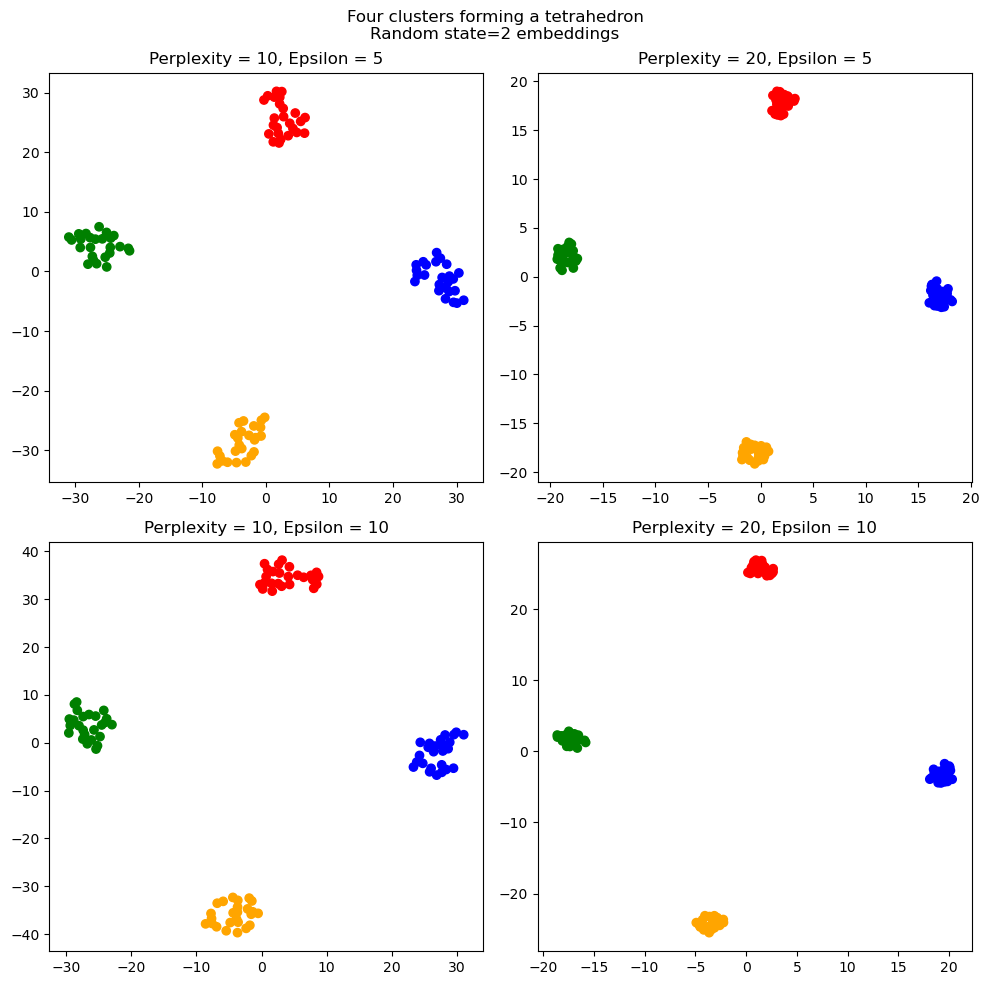

In [ ]:
# random_state=2
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Four clusters forming a tetrahedron\nRandom state=2 embeddings')

ax1 = fig.add_subplot(221)
ax1.scatter(tetrahedron_embedding_rs2_1[:, 0], tetrahedron_embedding_rs2_1[:, 1],
            c=cluster_colors)
ax1.set_title('Perplexity = 10, Epsilon = 5')

ax2 = fig.add_subplot(222)
ax2.scatter(tetrahedron_embedding_rs2_2[:, 0], tetrahedron_embedding_rs2_2[:, 1],
            c=cluster_colors)
ax2.set_title('Perplexity = 20, Epsilon = 5')

ax3 = fig.add_subplot(223)
ax3.scatter(tetrahedron_embedding_rs2_3[:, 0], tetrahedron_embedding_rs2_3[:, 1],
            c=cluster_colors)
ax3.set_title('Perplexity = 10, Epsilon = 10')

ax4 = fig.add_subplot(224)
ax4.scatter(tetrahedron_embedding_rs2_4[:, 0], tetrahedron_embedding_rs2_4[:, 1],
            c=cluster_colors)
ax4.set_title('Perplexity = 20, Epsilon = 10')

fig.tight_layout()

The vertices order is consistent across different parameters and random states. Finally, we will run the same experiments on a newly generated tetrahedron.

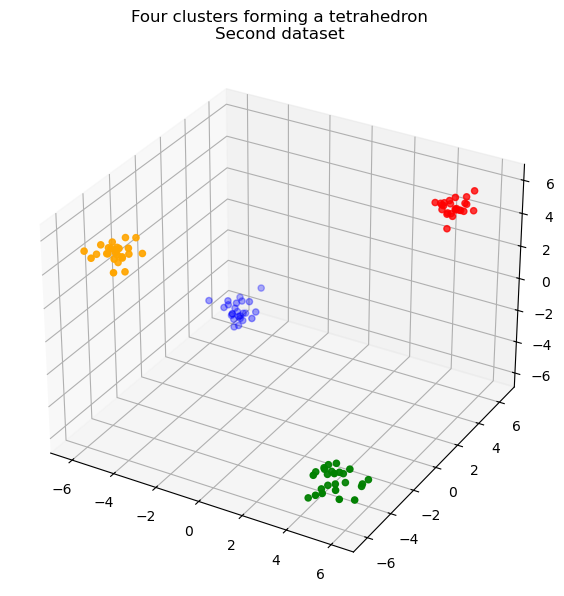

In [ ]:
# Generate new tetrahedron
clusters2 = []
for vertex in vertices:
    cluster = np.random.randn(points_per_cluster, 3) * 0.5 + vertex
    clusters2.append(cluster)
tetrahedron2 = np.vstack(clusters2)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tetrahedron2[:, 0], tetrahedron2[:, 1], tetrahedron2[:, 2],
           color=cluster_colors)
ax.set_title('Four clusters forming a tetrahedron\nSecond dataset')
plt.show()

In [ ]:
## Apply t-SNE on the second dataset
# random_state=1
%time tetrahedron2_embedding_rs1_1 = tsne(tetrahedron2, r=2, perplexity=10, n_iter=5000, learning_rate=5, random_state=1)
%time tetrahedron2_embedding_rs1_2 = tsne(tetrahedron2, r=2, perplexity=20, n_iter=5000, learning_rate=5, random_state=1)
%time tetrahedron2_embedding_rs1_3 = tsne(tetrahedron2, r=2, perplexity=10, n_iter=5000, learning_rate=10, random_state=1)
%time tetrahedron2_embedding_rs1_4 = tsne(tetrahedron2, r=2, perplexity=20, n_iter=5000, learning_rate=10, random_state=1)

# random_state=2
%time tetrahedron2_embedding_rs2_1 = tsne(tetrahedron2, r=2, perplexity=10, n_iter=5000, learning_rate=5, random_state=2)
%time tetrahedron2_embedding_rs2_2 = tsne(tetrahedron2, r=2, perplexity=20, n_iter=5000, learning_rate=5, random_state=2)
%time tetrahedron2_embedding_rs2_3 = tsne(tetrahedron2, r=2, perplexity=10, n_iter=5000, learning_rate=10, random_state=2)
%time tetrahedron2_embedding_rs2_4 = tsne(tetrahedron2, r=2, perplexity=20, n_iter=5000, learning_rate=10, random_state=2)

CPU times: user 24.2 s, sys: 2min 57s, total: 3min 21s
Wall time: 52.5 s
CPU times: user 24.8 s, sys: 3min 2s, total: 3min 27s
Wall time: 54.5 s
CPU times: user 23.2 s, sys: 2min 52s, total: 3min 15s
Wall time: 51.3 s
CPU times: user 25.6 s, sys: 3min 17s, total: 3min 43s
Wall time: 57.6 s
CPU times: user 21.6 s, sys: 2min 37s, total: 2min 59s
Wall time: 47.3 s
CPU times: user 24.6 s, sys: 3min 8s, total: 3min 32s
Wall time: 55.2 s
CPU times: user 23.3 s, sys: 2min 56s, total: 3min 19s
Wall time: 51.7 s
CPU times: user 26.2 s, sys: 3min 24s, total: 3min 50s
Wall time: 59.5 s


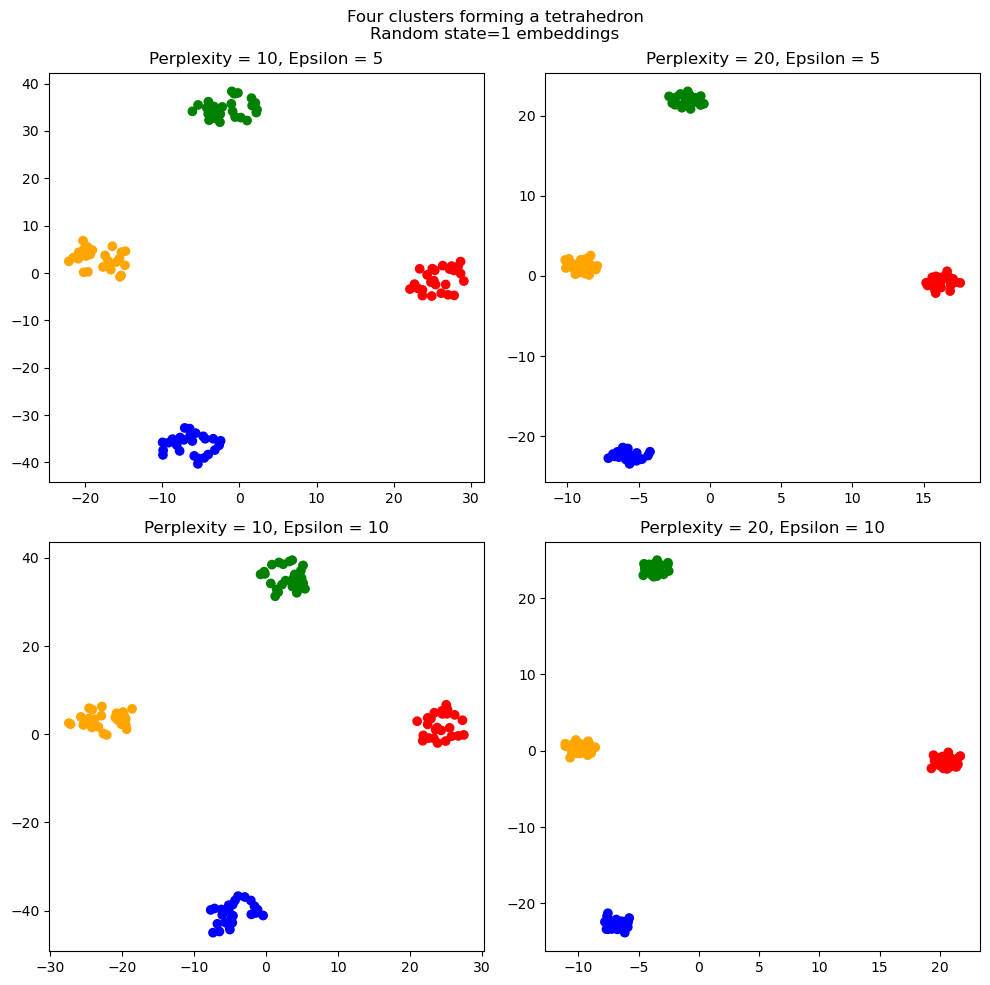

In [ ]:
# Plot the t-SNE embeddings of the second dataset
# random_state=1
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Four clusters forming a tetrahedron\nRandom state=1 embeddings')

ax1 = fig.add_subplot(221)
ax1.scatter(tetrahedron2_embedding_rs1_1[:, 0], tetrahedron2_embedding_rs1_1[:, 1],
            c=cluster_colors)
ax1.set_title('Perplexity = 10, Epsilon = 5')

ax2 = fig.add_subplot(222)
ax2.scatter(tetrahedron2_embedding_rs1_2[:, 0], tetrahedron2_embedding_rs1_2[:, 1],
            c=cluster_colors)
ax2.set_title('Perplexity = 20, Epsilon = 5')

ax3 = fig.add_subplot(223)
ax3.scatter(tetrahedron2_embedding_rs1_3[:, 0], tetrahedron2_embedding_rs1_3[:, 1],
            c=cluster_colors)
ax3.set_title('Perplexity = 10, Epsilon = 10')

ax4 = fig.add_subplot(224)
ax4.scatter(tetrahedron2_embedding_rs1_4[:, 0], tetrahedron2_embedding_rs1_4[:, 1],
            c=cluster_colors)
ax4.set_title('Perplexity = 20, Epsilon = 10')

fig.tight_layout()

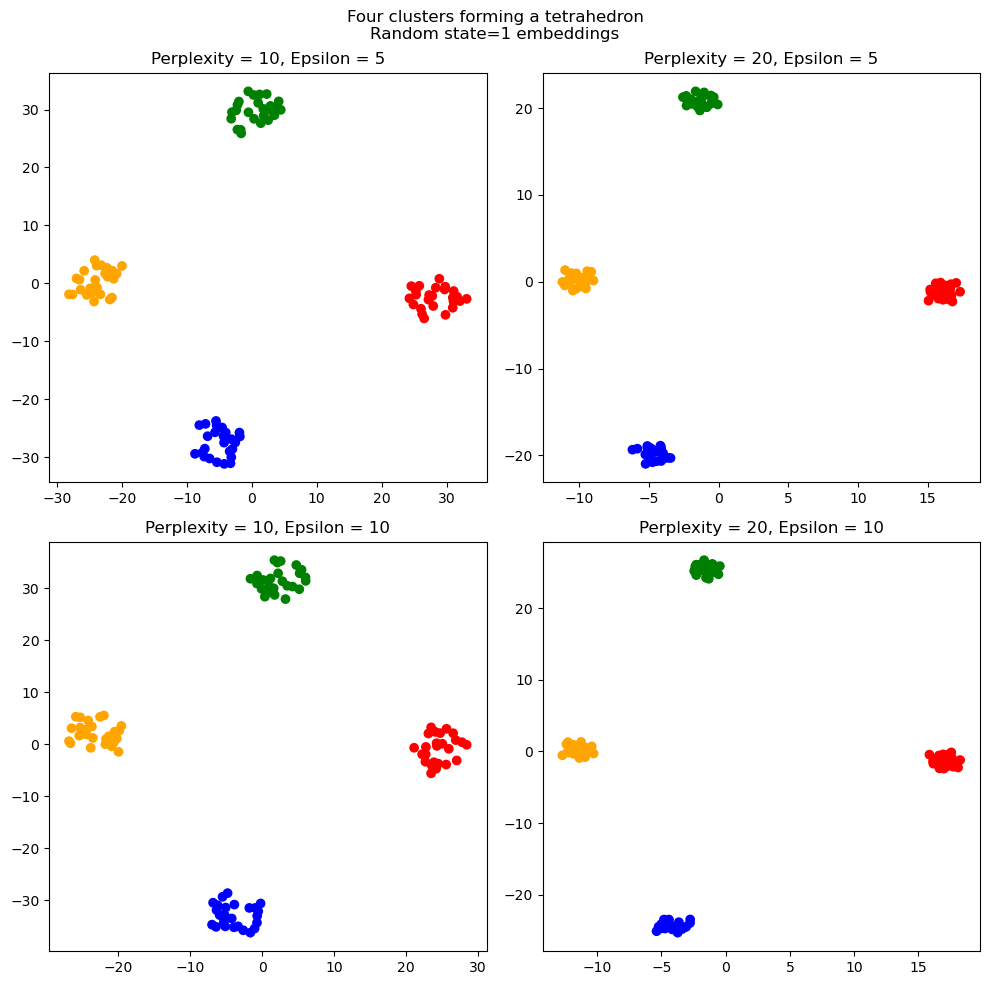

In [ ]:
# Plot the t-SNE embeddings of the second dataset
# random_state=1
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Four clusters forming a tetrahedron\nRandom state=1 embeddings')

ax1 = fig.add_subplot(221)
ax1.scatter(tetrahedron2_embedding_rs2_1[:, 0], tetrahedron2_embedding_rs2_1[:, 1],
            c=cluster_colors)
ax1.set_title('Perplexity = 10, Epsilon = 5')

ax2 = fig.add_subplot(222)
ax2.scatter(tetrahedron2_embedding_rs2_2[:, 0], tetrahedron2_embedding_rs2_2[:, 1],
            c=cluster_colors)
ax2.set_title('Perplexity = 20, Epsilon = 5')

ax3 = fig.add_subplot(223)
ax3.scatter(tetrahedron2_embedding_rs2_3[:, 0], tetrahedron2_embedding_rs2_3[:, 1],
            c=cluster_colors)
ax3.set_title('Perplexity = 10, Epsilon = 10')

ax4 = fig.add_subplot(224)
ax4.scatter(tetrahedron2_embedding_rs2_4[:, 0], tetrahedron2_embedding_rs2_4[:, 1],
            c=cluster_colors)
ax4.set_title('Perplexity = 20, Epsilon = 10')

fig.tight_layout()

It looks like slight changes in the dataset can vary the vertices order. Let us generate more datasets and see if opposite vertices can become adjacent.

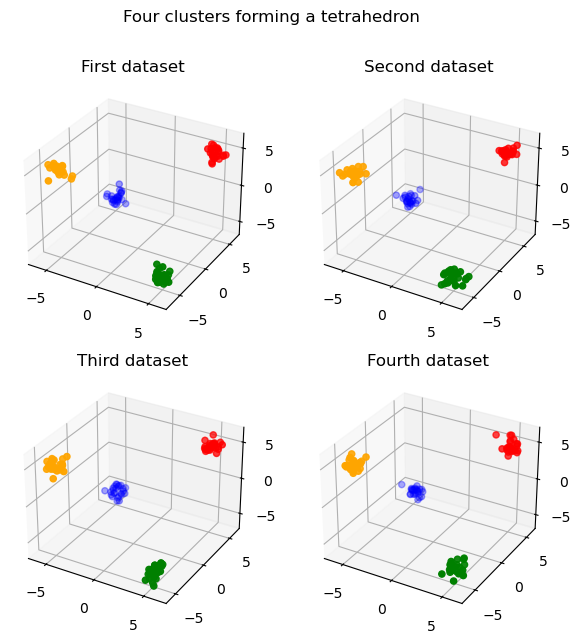

In [ ]:
# Generate new datasets
clusters3 = []
for vertex in vertices:
    cluster = np.random.randn(points_per_cluster, 3) * 0.5 + vertex
    clusters3.append(cluster)
tetrahedron3 = np.vstack(clusters3)

clusters4 = []
for vertex in vertices:
    cluster = np.random.randn(points_per_cluster, 3) * 0.5 + vertex
    clusters4.append(cluster)
tetrahedron4 = np.vstack(clusters4)

fig = plt.figure(figsize=(7, 7))
fig.suptitle('Four clusters forming a tetrahedron')

ax1 = fig.add_subplot(221, projection='3d')
ax1.scatter(tetrahedron[:, 0], tetrahedron[:, 1], tetrahedron[:, 2],
           color=cluster_colors)
ax1.set_title('First dataset')

ax2 = fig.add_subplot(222, projection='3d')
ax2.scatter(tetrahedron2[:, 0], tetrahedron2[:, 1], tetrahedron2[:, 2],
            color=cluster_colors)
ax2.set_title('Second dataset')

ax3 = fig.add_subplot(223, projection='3d')
ax3.scatter(tetrahedron3[:, 0], tetrahedron3[:, 1], tetrahedron3[:, 2],
            color=cluster_colors)
ax3.set_title('Third dataset')

ax4 = fig.add_subplot(224, projection='3d')
ax4.scatter(tetrahedron4[:, 0], tetrahedron4[:, 1], tetrahedron4[:, 2],
            color=cluster_colors)
ax4.set_title('Fourth dataset')
plt.show()

In [ ]:
# Apply t-SNE to different datasets
%time tetrahedron1_embedding = tsne(tetrahedron, r=2, perplexity=20, n_iter=5000, learning_rate=5, random_state=42)
%time tetrahedron2_embedding = tsne(tetrahedron2, r=2, perplexity=20, n_iter=5000, learning_rate=5, random_state=42)
%time tetrahedron3_embedding = tsne(tetrahedron3, r=2, perplexity=20, n_iter=5000, learning_rate=5, random_state=42)
%time tetrahedron4_embedding = tsne(tetrahedron4, r=2, perplexity=20, n_iter=5000, learning_rate=5, random_state=42)

CPU times: user 23.1 s, sys: 2min 45s, total: 3min 8s
Wall time: 49.7 s
CPU times: user 25.8 s, sys: 3min 11s, total: 3min 36s
Wall time: 57.6 s
CPU times: user 22.7 s, sys: 2min 49s, total: 3min 12s
Wall time: 49.8 s
CPU times: user 22.7 s, sys: 2min 49s, total: 3min 11s
Wall time: 50.4 s


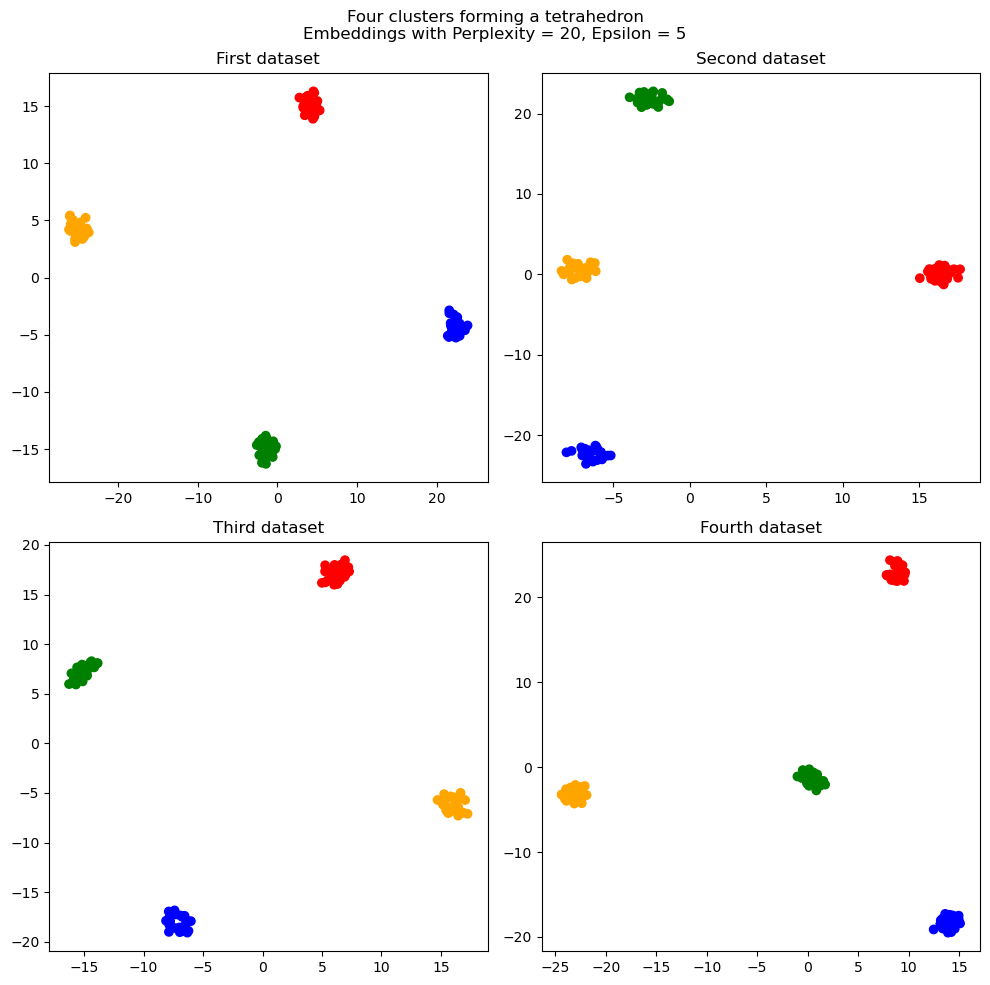

In [ ]:
# Plot the t-SNE embeddings of the four datasets
fig = plt.figure(figsize=(10, 10))
fig.suptitle(
    'Four clusters forming a tetrahedron\nEmbeddings with Perplexity = 20, Epsilon = 5')

ax1 = fig.add_subplot(221)
ax1.scatter(tetrahedron1_embedding[:, 0], tetrahedron1_embedding[:, 1],
            c=cluster_colors)
ax1.set_title('First dataset')

ax2 = fig.add_subplot(222)
ax2.scatter(tetrahedron2_embedding[:, 0], tetrahedron2_embedding[:, 1],
            c=cluster_colors)
ax2.set_title('Second dataset')

ax3 = fig.add_subplot(223)
ax3.scatter(tetrahedron3_embedding[:, 0], tetrahedron3_embedding[:, 1],
            c=cluster_colors)
ax3.set_title('Third dataset')

ax4 = fig.add_subplot(224)
ax4.scatter(tetrahedron4_embedding[:, 0], tetrahedron4_embedding[:, 1],
            c=cluster_colors)
ax4.set_title('Fourth dataset')

fig.tight_layout()

Indeed, we can conclude that slight changes in the dataset can producde significant changes in the embedding. In this case, variations in the noise of each vertex of the tetrahedron may embed a pair of vertices in the high-dimensional space into opposite or adjacent vertices of a square (or even not form a square).

### 3.1 Solid tetrahedron

In [5]:
# Define vertices of a regular tetrahedron with v1 at the origin
vertices = np.array([[0, 0, 0],
                     [1, 0, 0],
                     [0.5, np.sqrt(3)/2, 0],
                     [0.5, np.sqrt(3)/6, np.sqrt(6)/3]
                     ])

# Check the tetrahedron in regular
dist_matrix = squareform(pdist(vertices))
print("Distance matrix between vertices:\n", dist_matrix)

Distance matrix between vertices:
 [[0. 1. 1. 1.]
 [1. 0. 1. 1.]
 [1. 1. 0. 1.]
 [1. 1. 1. 0.]]


In [6]:
# Sample points uniformly at random inside the tetrahedron
solid_tetrahedron = runif_in_tetrahedron(1000, vertices)

In [18]:
# Compute the closest vertex for each point in sims
def get_point_colors(solid_tetrahedron):
    # Use NumPy broadcasting to compute distance between the i-th point and the j-th vertex
    distances = np.linalg.norm(
        solid_tetrahedron[:, None, :] - vertices[None, :, :], axis=2)
    closest_vertex = np.argmin(distances, axis=1)

    # Define a color map
    colors_map = np.array(['red', 'green', 'blue', 'orange'])
    point_colors = colors_map[closest_vertex]
    return point_colors
point_colors = get_point_colors(solid_tetrahedron)

In [19]:
# Plot Data in Tetrahedron Mesh
# i, j, k are the indices of the tetrahedron vertices that make up the x, y, z coordinates of the faces' vertices
fig = go.Figure(data=[
    go.Mesh3d(
        x=vertices[:, 0],
        y=vertices[:, 1],
        z=vertices[:, 2],
        i=[0, 0, 0, 1],
        j=[1, 1, 2, 2],
        k=[2, 3, 3, 3],
        color='grey',
        opacity=0.2,
        name='Tetrahedron'
    ),
    go.Scatter3d(
        x=solid_tetrahedron[:, 0],
        y=solid_tetrahedron[:, 1],
        z=solid_tetrahedron[:, 2],
        mode='markers',
        marker=dict(size=3, color=point_colors),
        name='Random Points'
    )
])

fig.update_layout(
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
        aspectmode='cube'
    ),
    title="Solid regular tetrahedron: Data"
)

fig.show()

In [20]:
# Generate four solid tetrahedrons and compare its t-SNE embeddings
solid_tetrahedron2 = runif_in_tetrahedron(1000, vertices)
solid_tetrahedron3 = runif_in_tetrahedron(1000, vertices)
solid_tetrahedron4 = runif_in_tetrahedron(1000, vertices)

In [21]:
# Compute closest vertex
point_colors2 = get_point_colors(solid_tetrahedron2)
point_colors3 = get_point_colors(solid_tetrahedron3)
point_colors4 = get_point_colors(solid_tetrahedron4)

In [22]:
# Apply t-SNE
%time solid_tetrahedron_embedding1 = tsne(solid_tetrahedron, r=2, perplexity=20, n_iter=5000, learning_rate=5, random_state=42, verbose=2)
%time solid_tetrahedron_embedding2 = tsne(solid_tetrahedron2, r=2, perplexity=20, n_iter=5000, learning_rate=5, random_state=42, verbose=2)
%time solid_tetrahedron_embedding3 = tsne(solid_tetrahedron3, r=2, perplexity=20, n_iter=5000, learning_rate=5, random_state=42, verbose=2)
%time solid_tetrahedron_embedding4 = tsne(solid_tetrahedron4, r=2, perplexity=20, n_iter=5000, learning_rate=5, random_state=42, verbose=2)

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, learning_rate=5, n_iter=5000, n_jobs=8,
     perplexity=20, random_state=42, verbose=2)
--------------------------------------------------------------------------------
===> Finding 60 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 0.09 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=12.00, lr=5.00 for 250 iterations...
Iteration   50, KL divergence 3.8821, 50 iterations in 9.4904 sec
Iteration  100, KL divergence 3.0518, 50 iterations in 9.9642 sec
Iteration  150, KL divergence 3.0128, 50 iterations in 10.8916 sec
Iteration  200, KL divergence 3.0249, 50 iterations in 11.0650 sec
Iteration  250, KL divergence 3.0255, 50 iterations in 11.0518 sec
   --> Time elapsed: 52.46 secon

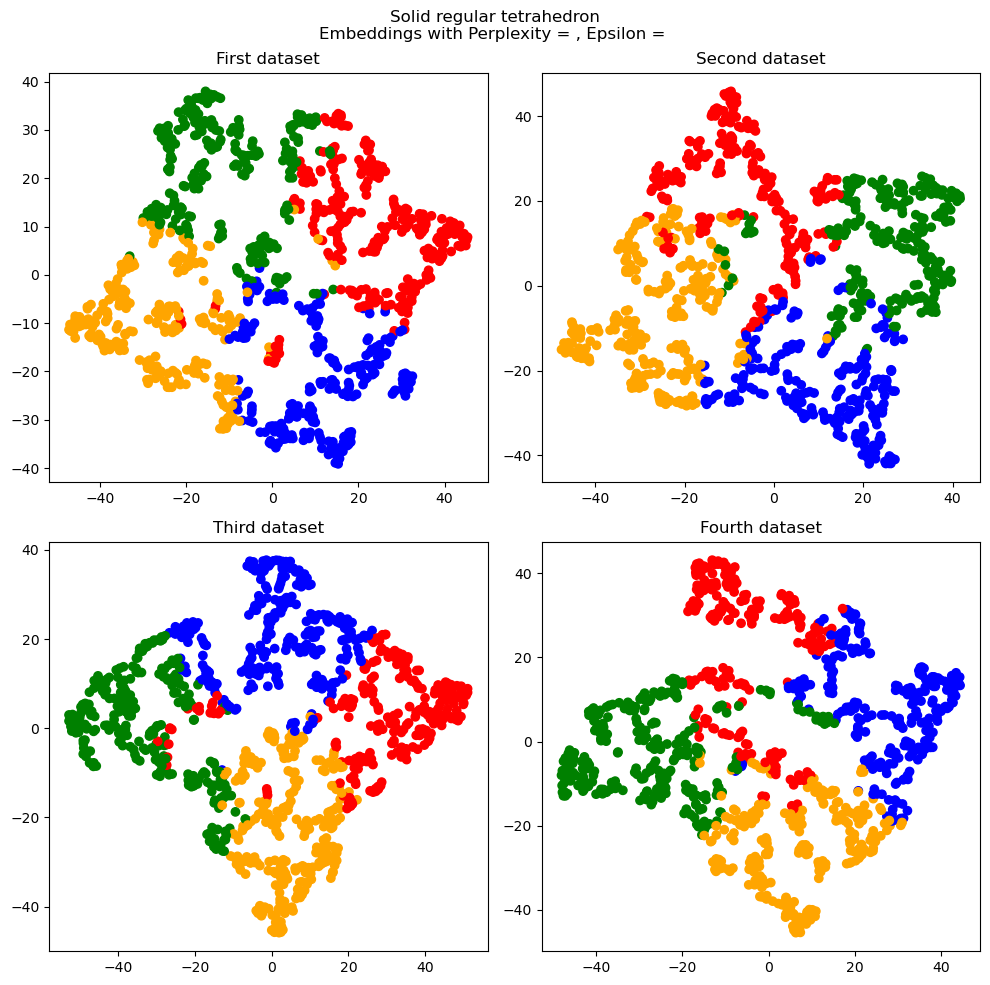

In [ ]:
# Plot solid tetrahedron embeddings
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Solid regular tetrahedron\nEmbeddings with Perplexity = 20, Epsilon = 5')

ax1 = fig.add_subplot(221)
ax1.scatter(solid_tetrahedron_embedding1[:, 0], solid_tetrahedron_embedding1[:, 1],
            c=point_colors)
ax1.set_title('First dataset')

ax2 = fig.add_subplot(222)
ax2.scatter(solid_tetrahedron_embedding2[:, 0], solid_tetrahedron_embedding2[:, 1],
            c=point_colors2)
ax2.set_title('Second dataset')

ax3 = fig.add_subplot(223)
ax3.scatter(solid_tetrahedron_embedding3[:, 0], solid_tetrahedron_embedding3[:, 1],
            c=point_colors3)
ax3.set_title('Third dataset')

ax4 = fig.add_subplot(224)
ax4.scatter(solid_tetrahedron_embedding4[:, 0], solid_tetrahedron_embedding4[:, 1],
            c=point_colors4)
ax4.set_title('Fourth dataset')
fig.tight_layout()

## 4. MNIST

In [4]:
# Load all_data.RData
rdata = pyreadr.read_r("all_data.RData")

all_data_pixels = rdata["all_data_pixels"]
target = rdata["target"]
type_data = rdata["type_data"]

target = np.squeeze(np.array(target))
type_data = np.squeeze(np.array(type_data))

# Select train images of numbers
numeric_target = pd.to_numeric(target, errors="coerce")
train_idx = (type_data == "train") & (pd.notnull(numeric_target))

MNIST_pixels = all_data_pixels.loc[train_idx].values
MNIST_target = numeric_target[train_idx]

print(f"MNIST_pixels shape: {MNIST_pixels.shape}")
print(f"MNIST_target shape: {MNIST_target.shape}")

MNIST_pixels shape: (345035, 784)
MNIST_target shape: (345035,)


In [5]:
# Split data into two equally sized partitions
n_images = MNIST_target.shape[0]
shuffled_indices = np.random.permutation(n_images)
partitions_idx = np.array_split(shuffled_indices, 2)

MNIST_pixels1 = MNIST_pixels[partitions_idx[0],:]
MNIST_target1 = MNIST_target[partitions_idx[0]]

MNIST_pixels2 = MNIST_pixels[partitions_idx[1], :]
MNIST_target2 = MNIST_target[partitions_idx[1]]

print(f"Partition 1 pixels shape: {MNIST_pixels1.shape}, targets shape: {MNIST_target1.shape}")
print(f"Partition 2 pixels shape: {MNIST_pixels2.shape}, targets shape: {MNIST_target2.shape}")

Partition 1 pixels shape: (172518, 784), targets shape: (172518,)
Partition 2 pixels shape: (172517, 784), targets shape: (172517,)


In [6]:
# Apply t-SNE
%time MNIST_embedding1 = tsne(MNIST_pixels1, r=2, random_state=42, verbose=2)
%time MNIST_embedding2 = tsne(MNIST_pixels2, r=2, random_state=42, verbose=2)

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, n_jobs=8, random_state=42, verbose=2)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 75.04 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 1.04 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 1.90 seconds
===> Running optimization with exaggeration=12.00, lr=14376.50 for 250 iterations...
Iteration   50, KL divergence 6.6395, 50 iterations in 2.5838 sec
Iteration  100, KL divergence 6.4172, 50 iterations in 2.6374 sec
Iteration  150, KL divergence 6.2970, 50 iterations in 2.5243 sec
Iteration  200, KL divergence 6.2271, 50 iterations in 2.4950 sec
Iteration  250, KL divergence 6.1896, 50 iterations in 2.5014 sec
   --> Time elapsed: 12.74 seconds
===> Running optimization with exaggeration=1

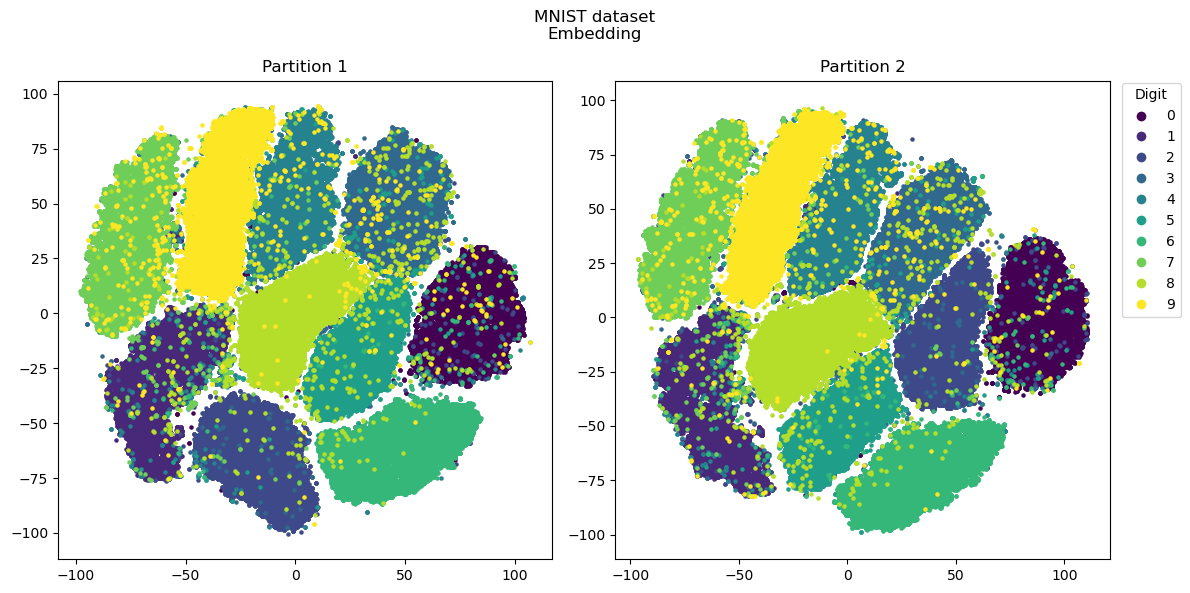

In [8]:
## Plot the t-SNE embedding
digits = np.unique(MNIST_target)
cmap = plt.get_cmap('viridis', len(digits))
# Create custom legend handles with larger markers
legend_handles = [mlines.Line2D([], [], linestyle='None', marker='o',
                                markersize=7,
                                markerfacecolor=cmap(i),
                                markeredgewidth=0,
                                label=int(digit))
                  for i, digit in enumerate(digits)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
# Partition 1
for i, digit in enumerate(digits):
    mask = MNIST_target1 == digit
    ax1.scatter(MNIST_embedding1[mask, 0], MNIST_embedding1[mask, 1],
                color=cmap(i),
                label=int(digit),
                s=5)
ax1.set_title('Partition 1')
ax1.axis('equal')

# Partition 2
for i, digit in enumerate(digits):
    mask = MNIST_target2 == digit
    ax2.scatter(MNIST_embedding2[mask, 0], MNIST_embedding2[mask, 1],
                color=cmap(i),
                s=5)
ax2.set_title('Partition 2')
ax2.axis('equal')
ax2.legend(handles=legend_handles, title="Digit", bbox_to_anchor=(1.01, 1.01), loc='upper left')

fig.suptitle('MNIST dataset\nEmbedding')
plt.tight_layout()
plt.show()

### Check if parallelization works
This is crucial for systems with Apple Silicon, like the MacBook Pro used to run this notebook.

In [8]:
_, parallel_runtime = benchmark(tsne, MNIST_pixels1, r=2, random_state=42, n_jobs=os.cpu_count())
_, serial_runtime = benchmark(tsne, MNIST_pixels1, r=2, random_state=42, n_jobs=1)

print(f'Parallel runtime: {parallel_runtime}')
print(f'Serianl runtime: {serial_runtime}')

Parallel runtime: 142.61916133400518
Serianl runtime: 482.7203125829983


## 5. Swiss Roll

In [7]:
# Generate dataset
n = 1000
swiss_roll, color = make_swiss_roll(n_samples=n, random_state=42)

In [11]:
# Apply t-SNE
%time tsne_swiss_roll = tsne(swiss_roll, perplexity=30, n_iter=5000, learning_rate=10, random_state=42)

CPU times: user 6min, sys: 1h 2min 46s, total: 1h 8min 47s
Wall time: 18min 18s


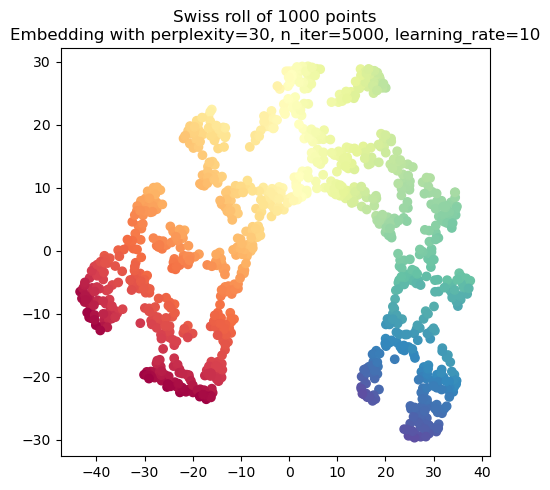

In [14]:
# Plot the t-SNE embedding
plt.figure(figsize=(5, 5))
plt.scatter(tsne_swiss_roll[:, 0], tsne_swiss_roll[:,
            1], c=color, cmap=plt.cm.Spectral)
plt.title(f'Swiss roll of {n} points\nEmbedding with perplexity=30, n_iter=5000, learning_rate=10')
plt.tight_layout()
plt.show()